In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget 'https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/data/Dutch_F3_Logs.zip?raw=true'

--2021-03-17 10:05:45--  https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/data/Dutch_F3_Logs.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/raw/master/data/Dutch_F3_Logs.zip [following]
--2021-03-17 10:05:45--  https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/raw/master/data/Dutch_F3_Logs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yohanesnuwara/python-bootcamp-for-geoengineers/master/data/Dutch_F3_Logs.zip [following]
--2021-03-17 10:05:45--  https://raw.githubusercontent.com/yohanesnuwara/python-bootcamp-for-geoengineers/master/data/Dutch_F3_Logs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133

In [ ]:
!unzip '/content/Dutch_F3_Logs.zip'

Archive:  /content/Dutch_F3_Logs.zip
   creating: Dutch_F3_Logs/
  inflating: Dutch_F3_Logs/F02-1_logs.las  
  inflating: Dutch_F3_Logs/F02-1_markers.txt  
  inflating: Dutch_F3_Logs/F03-2_logs.las  
  inflating: Dutch_F3_Logs/F03-2_markers.txt  
  inflating: Dutch_F3_Logs/F03-4_logs.las  
  inflating: Dutch_F3_Logs/F03-4_markers.txt  
  inflating: Dutch_F3_Logs/F06-1_logs.las  
  inflating: Dutch_F3_Logs/F06-1_markers.txt  


In [ ]:
F021_path = '/content/Dutch_F3_Logs/F02-1_logs.las'
F032_path = '/content/Dutch_F3_Logs/F03-2_logs.las'
F034_path = '/content/Dutch_F3_Logs/F03-4_logs.las'
F061_path = '/content/Dutch_F3_Logs/F06-1_logs.las'

In [ ]:
!pip install lasio

In [ ]:
import lasio

In [ ]:
F021 = lasio.read(F021_path)
F032 = lasio.read(F032_path)
F034 = lasio.read(F034_path)
F061 = lasio.read(F061_path)

In [ ]:
F021.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']

In [ ]:
F032.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']

In [ ]:
F034.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']

In [ ]:
F021.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="1     DEPTH", original_mnemonic="DEPTH", data.shape=(9680,)),
 CurveItem(mnemonic="RHOB", unit="kg/m3", value="", descr="2     Density", original_mnemonic="RHOB", data.shape=(9680,)),
 CurveItem(mnemonic="DT", unit="us/m", value="", descr="3     Sonic", original_mnemonic="DT", data.shape=(9680,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="4     Gamma Ray", original_mnemonic="GR", data.shape=(9680,)),
 CurveItem(mnemonic="AI", unit="m/s)*(kg/m3", value="", descr="5     P-Impedance", original_mnemonic="AI", data.shape=(9680,)),
 CurveItem(mnemonic="AI_REL", unit="m/s)*(kg/m3", value="", descr="6     P-Impedance_rel", original_mnemonic="AI_REL", data.shape=(9680,)),
 CurveItem(mnemonic="PHIE", unit="fraction", value="", descr="7     Porosity", original_mnemonic="PHIE", data.shape=(9680,))]

In [ ]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 157 (delta 73), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (157/157), 10.58 MiB | 3.78 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
# import all functions from formation-evaluation
import sys
sys.path.append('/content/formation-evaluation')

from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator

In [ ]:
def calculate_klogh(formation_name, phif, vsh):
  # there is no available equation for Heather Fm. 
  if formation_name == 'hugin':
    return 10 ** (2 + (8 * phif) - (9 * vsh))
  if formation_name == 'sleipner':
    return 10 ** (-3 + (32 * phif) - (2 * vsh))
  if formation_name == 'skagerak':
    return 10 ** (-1.85 + (17.4 * phif) - (3 * vsh))

In [ ]:
#depth = F021['DEPTH']
#rhob = F021['RHOB']
#dt = F021['DT']
#gr = F021['GR']
#ai = F021['AI']
#phie = F021['PHIE']

In [ ]:
depth = F032['DEPTH']
rhob = F032['RHOB']
dt = F032['DT']
gr = F032['GR']
ai = F032['AI']
phie = F032['PHIE']

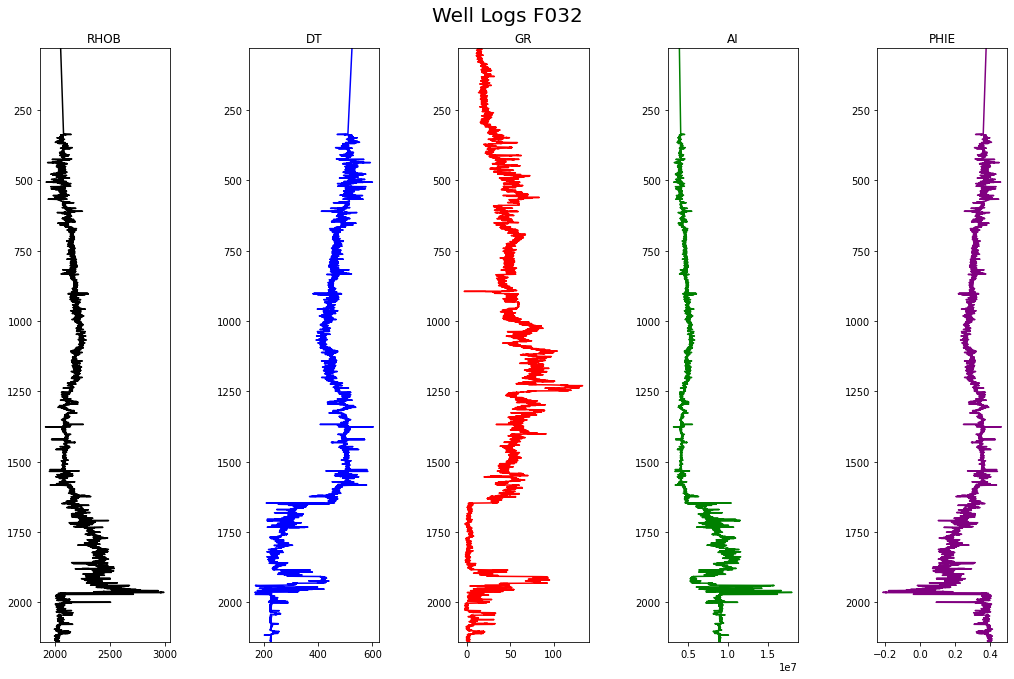

In [ ]:
plt.figure(figsize=(15,10))

#plt.suptitle('Well Logs F021', size=20)
plt.suptitle('Well Logs F032', size=20)

plt.subplot(1,5,1)
plt.plot(rhob, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('RHOB')

plt.subplot(1,5,2)
plt.plot(dt, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('DT')

plt.subplot(1,5,3)
plt.plot(gr, depth, color='red')
plt.ylim(max(depth), min(depth))
plt.title('GR')

plt.subplot(1,5,4)
plt.plot(ai, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('AI')

plt.subplot(1,5,5)
plt.plot(phie, depth, color='purple')
plt.ylim(max(depth), min(depth))
plt.title('PHIE')

# set space between logs
plt.tight_layout(4) 
plt.show()

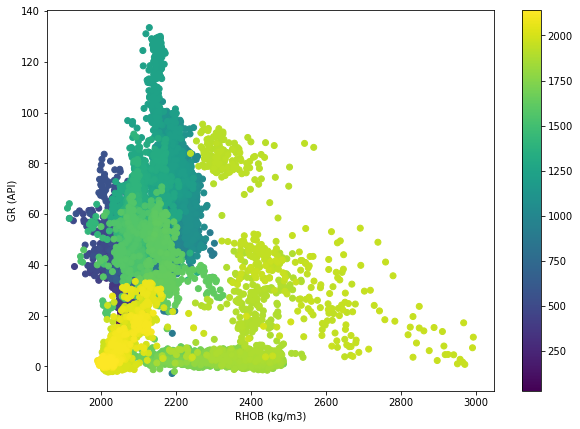

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(rhob, gr, c=depth)

plt.xlabel('RHOB (kg/m3)')
plt.ylabel('GR (API)')
plt.colorbar()
plt.show()

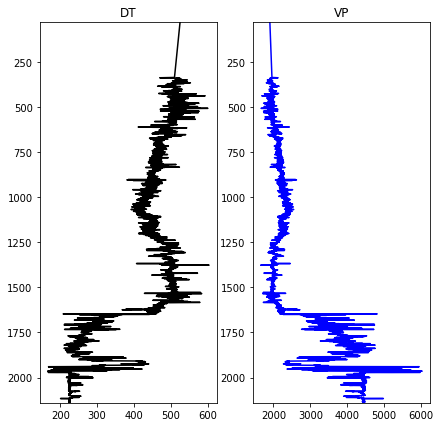

In [ ]:
# convert DT to VP
vp = 1E+06 / dt 

# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(dt, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('DT')

plt.subplot(1,2,2)
plt.plot(vp, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('VP')

plt.show()

In [ ]:
np.min(gr), np.max(gr)

(nan, nan)

In [ ]:
def fillna(log):
  """
  Replace (Impute) NaN values with Average Values
  """
  log_nan_remove = log[~np.isnan(log)]
  mean = np.mean(log_nan_remove)
  log[np.isnan(log)] = mean
  return log

In [ ]:
gr_imputed = fillna(gr)

In [ ]:
np.min(gr), np.max(gr)

(-2.8, 133.4543)

In [ ]:
gr_min = np.min(gr_imputed)
gr_max = np.max(gr_imputed)

vsh = (gr_imputed - gr_min) / (gr_max - gr_min)

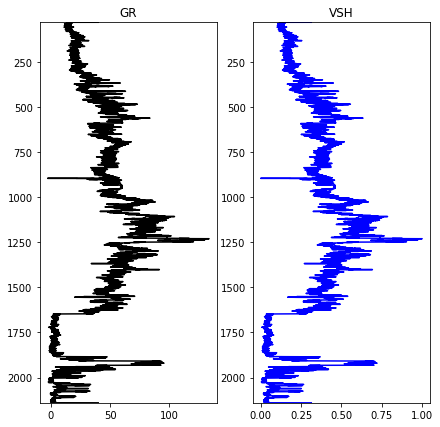

In [ ]:
# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(gr, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('GR')

plt.subplot(1,2,2)
plt.plot(vsh, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('VSH')

plt.show()

In [ ]:
denma = 2.67 # g/cc
rhof = 1

# convert RHOB from kg/m3 to g/cc unit
rhob_converted = rhob * 0.001

dphi = (denma - rhob_converted) / (denma - rhof)

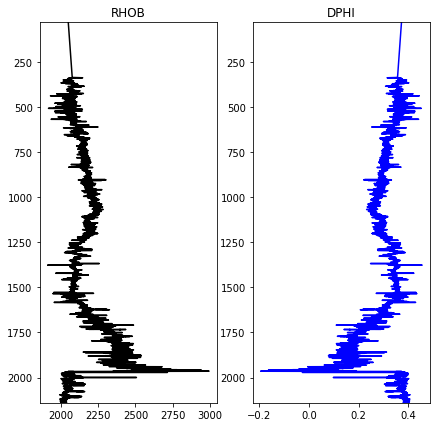

In [ ]:
# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(rhob, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('RHOB')

plt.subplot(1,2,2)
plt.plot(dphi, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('DPHI')

plt.show()

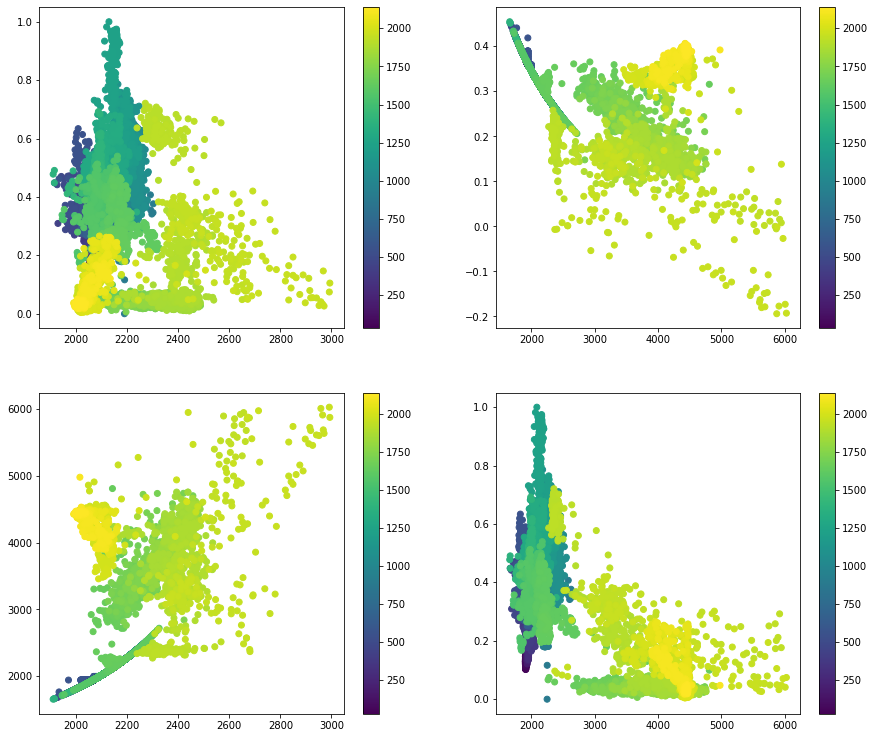

In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
plt.scatter(rhob, vsh, c=depth)
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(vp, dphi, c=depth)
plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(rhob, vp, c=depth)
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(vp, vsh, c=depth)
plt.colorbar()

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
well_df = pd.DataFrame({'RHOB': rhob, 'DT': dt, 'GR': gr, 'AI': ai, 'PHIE': phie})
depth_df = pd.DataFrame({'DEPTH': depth})
well_df

,RHOB,DT,GR,AI,PHIE
0,NaN,NaN,39.885378,NaN,NaN
1,2048.8999,524.9269,13.697200,3903209.75,0.3757
2,2048.8999,524.9194,13.776200,3903265.25,0.3757
3,2048.8999,524.9120,14.642400,3903320.25,0.3757
4,2048.8999,524.9048,16.344800,3903374.25,0.3757
...,...,...,...,...,...
14062,2020.2554,224.8410,2.761500,8985558.00,0.3936
14063,2013.6410,225.3736,2.016000,8934869.00,0.3977
14064,2014.4000,224.0571,3.300000,8990566.00,0.3972
14065,NaN,NaN,39.885378,NaN,NaN


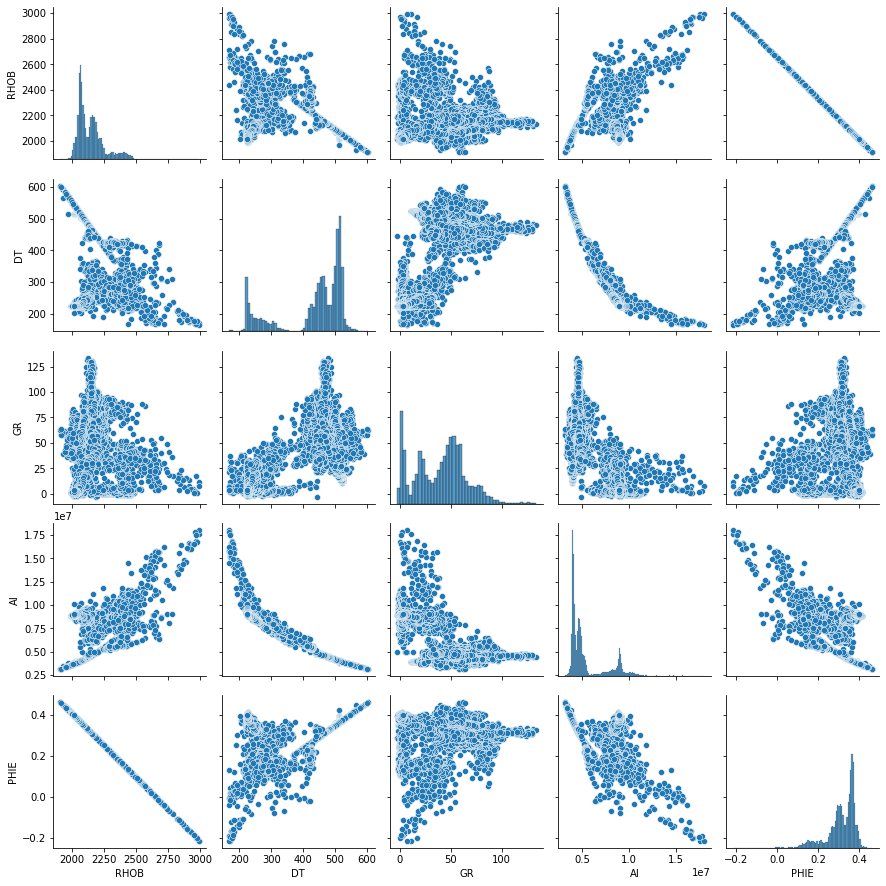

In [ ]:
sns.pairplot(well_df)
plt.show()

In [ ]:
F032.data

array([[3.00000000e+01,            nan,            nan, ...,
                   nan,            nan,            nan],
       [3.01500000e+01, 2.04889990e+03, 5.24926900e+02, ...,
        3.90320975e+06, 7.02713250e+05, 3.75700000e-01],
       [3.03000000e+01, 2.04889990e+03, 5.24919400e+02, ...,
        3.90326525e+06, 1.59601600e+02, 3.75700000e-01],
       ...,
       [2.13960010e+03, 2.01440000e+03, 2.24057100e+02, ...,
        8.99056600e+06, 8.99056600e+06, 3.97200000e-01],
       [2.13975000e+03,            nan,            nan, ...,
                   nan,            nan,            nan],
       [2.13990010e+03,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [ ]:
# convert it to Pandas dataframe using .df() and then reset index
well = F032.df().reset_index()

In [ ]:
# then show the dataframe
well.head(10)

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,30.00,NaN,NaN,39.885378,NaN,NaN,NaN
1,30.15,2048.8999,524.9269,13.697200,3903209.75,702713.2500,0.3757
2,30.30,2048.8999,524.9194,13.776200,3903265.25,159.6016,0.3757
3,30.45,2048.8999,524.9120,14.642400,3903320.25,159.6016,0.3757
4,30.60,2048.8999,524.9048,16.344800,3903374.25,159.6016,0.3757
5,30.75,2048.8999,524.8975,17.274000,3903428.75,159.6016,0.3757
6,30.90,2048.8999,524.8901,17.089600,3903484.00,159.6016,0.3757
7,31.05,2048.8999,524.8826,15.523900,3903539.25,159.6016,0.3757
8,31.20,2048.9707,524.8752,14.202700,3903729.25,159.6016,0.3756
9,31.35,2049.0000,524.8678,14.462400,3903840.50,159.6016,0.3756


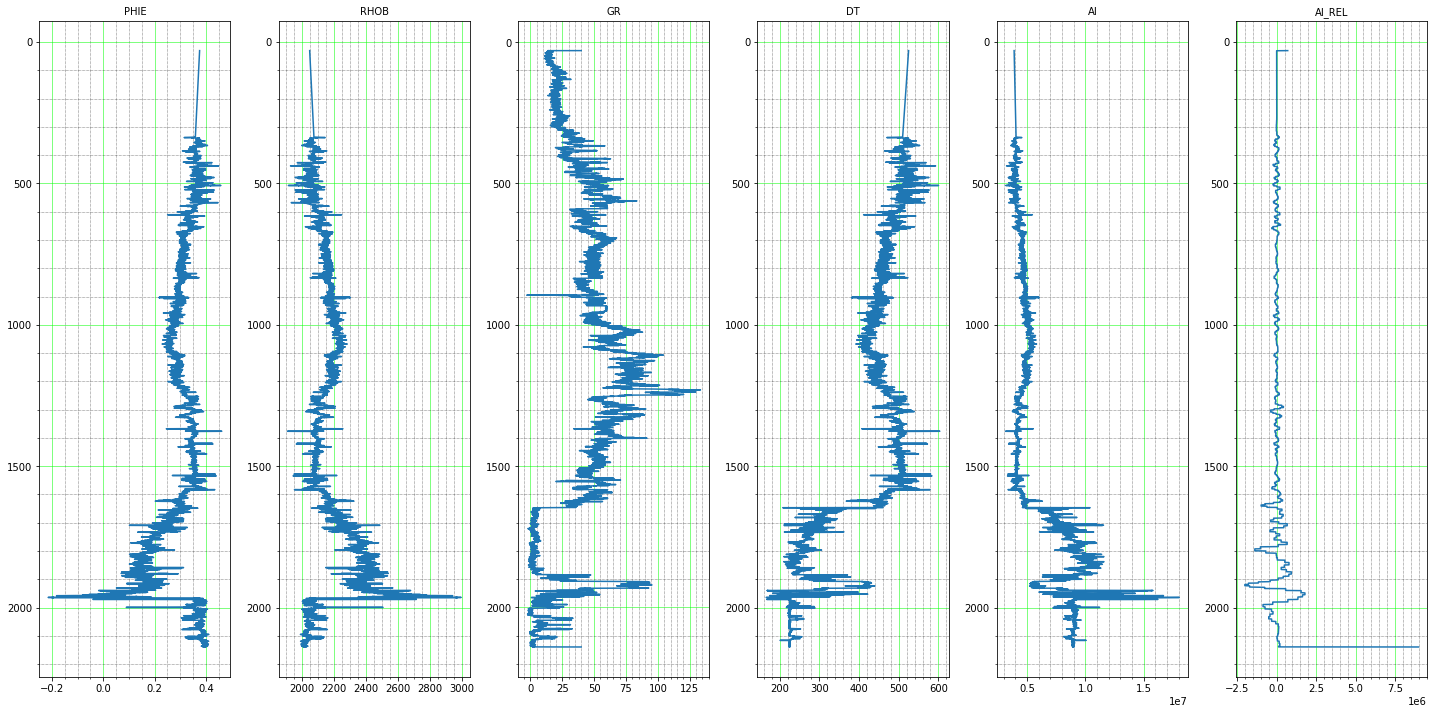

In [ ]:
# Logs we gonna visualize are: 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'DTS' 
df_well = well
column_depth = 'DEPTH'
column_list = ['PHIE', 'RHOB', 'GR', 'DT', 'AI', 'AI_REL']

well_log_display(df_well, column_depth, column_list)

In [ ]:
column_list

['PHIE', 'RHOB', 'GR', 'DT', 'AI', 'AI_REL']

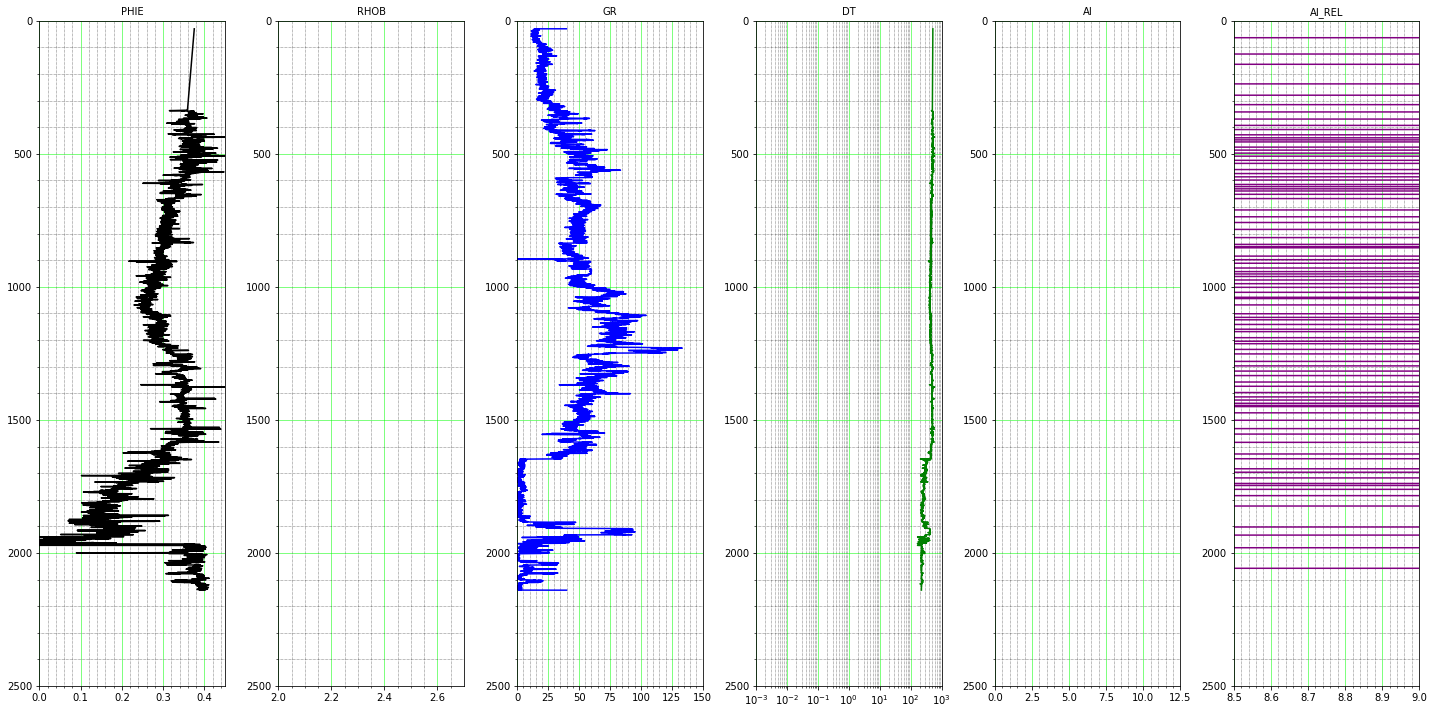

In [ ]:
# adding optional variables like "min_depth", "max_depth", etc.
column_semilog=3
min_depth=0 
max_depth=2500 
column_min=[0, 2, 0, 0.001, 0, 8.5, 50, 100] 
column_max=[0.45, 2.7, 150, 1000, 12.5, 9, 125, 330] 
colors=['black', 'red', 'blue', 'green', 'orange', 'purple', 'gray', 'cyan']  

well_log_display(df_well, column_depth, column_list,
                 column_semilog, min_depth, max_depth,
                 column_min, column_max, colors)

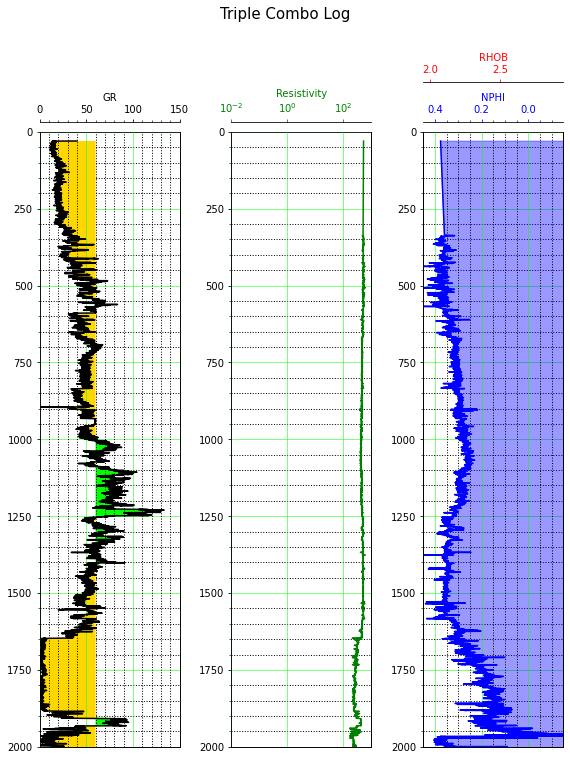

In [ ]:
df = well
column_depth = 'DEPTH'
column_GR = 'GR'
column_resistivity = 'DT'
column_RHOB = 'RHOB'
column_PHI = 'PHIE'
min_depth = 0
max_depth = 2000

triple_combo(df, column_depth, column_GR, column_resistivity,
             column_PHI, column_RHOB, min_depth, max_depth)